# Analysis of the auction and greedy algorithms

In [1]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import os
import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
modular_funcs = 'Utility / Sqrt Sum, Product, Pow percent sum'
fixed_modular_funcs = 'Utility / Sqrt Sum, Product'
model_settings = ['t10_s2', 't15_s3', 't30_s6', 't40_s8']

In [3]:
def plot_data_boxplot(folder, setting, algos, plot, metric='social welfare', only_optimal=True):
    results_data = []
    for filename in os.listdir(folder):
        if setting in filename:
            with open(f'{folder}/{filename}') as file:
                file_data = json.load(file)
                results_data += file_data
    
    plot_data = [[] for _ in range(len(algos))]
    for data in results_data:
        for p, algo in enumerate(algos):
            if algo in data:
                plot_data[p].append(data[algo][metric])
    plot.boxplot(plot_data, vert=False, widths=0.9)

In [4]:
def plot_data_optimal(folder, setting, algos, plot, optimal, metric='social welfare'):
    results_data = []
    for filename in os.listdir(folder):
        if setting in filename:
            with open(f'{folder}/{filename}') as file:
                file_data = json.load(file)
                results_data += file_data
                
    for p, algo in enumerate(algos):
        plot_data = []
        for data in results_data:
            if algo in data and optimal in data:
                plot_data.append(data[algo][metric] / data[optimal][metric])
        plot.scatter(plot_data, p * np.ones(len(plot_data)))

### Auction

In [5]:
auction_algos = [
    'Flexible VCG',
    'Fixed VCG',
    f'Critical Value Auction {modular_funcs}',
    'Optimal DIA'
]
auction_folder = '../data/auctions'

print('Filenames: Length')
for filename in os.listdir(auction_folder):
    with open(f'{auction_folder}/{filename}') as file:
        json_data = json.load(file)
        print(f'\t{filename}: {len(json_data)}')

Filenames: Length
	auctions_paper_r_t10_s2_dt09-18_12-10-34.json: 44
	auctions_paper_r_t10_s2_dt09-19_19-34-58.json: 3
	auctions_paper_r_t15_s3_dt07-22_11-55-31.json: 50
	auctions_paper_r_t15_s3_dt09-19_19-34-58.json: 2
	auctions_paper_r_t30_s6_dt07-22_11-55-31.json: 50
	auctions_paper_r_t30_s6_dt07-28_23-48-03.json: 50
	auctions_paper_r_t40_s8_dt07-22_11-57-21.json: 45


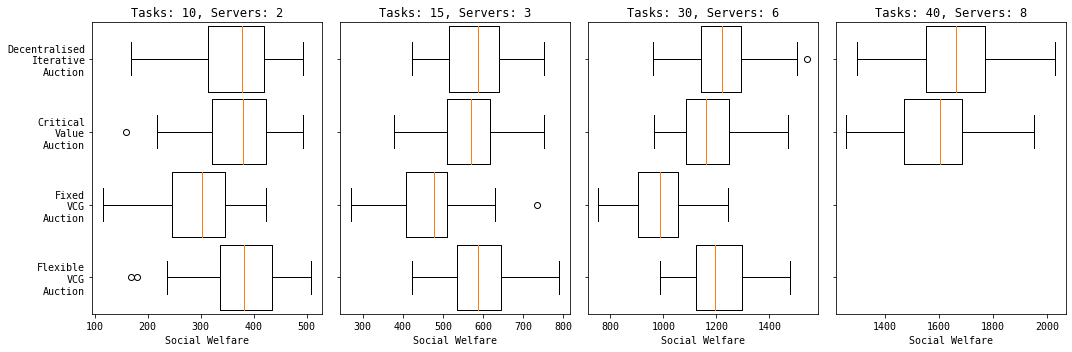

In [6]:
auction_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(15, 5))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_boxplot(auction_folder, model_setting, auction_algos, model_plot)
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Social Welfare')
    model_plot.set_yticklabels([''] * len(auction_algos))
model_plots[0].set_yticklabels(['Flexible\nVCG\nAuction', 'Fixed\nVCG\nAuction', 
                                'Critical\nValue\nAuction', 'Decentralised\nIterative\nAuction'])
plt.tight_layout()

c:\users\markm\anaconda3\envs\flexible-cloud-resource\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


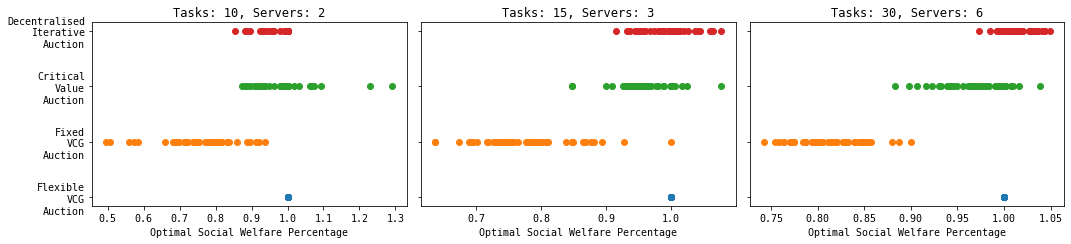

In [7]:
auction_fig, model_plots = plt.subplots(1, len(model_settings[:3]), figsize=(15, 3.5))
for model_setting, model_plot in zip(model_settings[:3], model_plots):
    plot_data_optimal(auction_folder, model_setting, auction_algos, model_plot, 'Flexible VCG')
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Optimal Social Welfare Percentage')
    model_plot.set_yticklabels([''] * len(auction_algos))
    model_plot.set_yticks(np.arange(0, len(auction_algos)))
model_plots[0].set_yticklabels(['Flexible\nVCG\nAuction', 'Fixed\nVCG\nAuction', 
                                'Critical\nValue\nAuction', 'Decentralised\nIterative\nAuction'])
plt.tight_layout()

### Greedy

In [8]:
greedy_algos = [
    f'Fixed Greedy {fixed_modular_funcs}',
    'Fixed Optimal',
    f'Greedy {modular_funcs}',
    'Flexible Optimal',
    'Server Relaxed Flexible Optimal'
]
greedy_folder = '../data/greedy'

print('Filenames: Length')
for filename in os.listdir(greedy_folder):
    with open(f'{greedy_folder}/{filename}') as file:
        json_data = json.load(file)
        print(f'\t{filename}: {len(json_data)}')

Filenames: Length
	greedy_paper_r_t10_s2_dt09-18_12-10-34.json: 5
	greedy_paper_r_t10_s2_dt09-19_19-34-58.json: 12
	greedy_paper_r_t15_s3_dt07-26_08-10-07.json: 50
	greedy_paper_r_t15_s3_dt07-27_08-49-33.json: 50
	greedy_paper_r_t15_s3_dt09-16_16-21-25.json: 10
	greedy_paper_r_t15_s3_dt09-19_19-34-58.json: 4
	greedy_paper_r_t30_s6_dt07-27_13-24-29.json: 50
	greedy_paper_r_t40_s8_dt07-14_15-06-16.json: 50
	greedy_paper_r_t40_s8_dt07-26_08-10-07.json: 47
	greedy_paper_r_t40_s8_dt07-27_20-02-19.json: 50


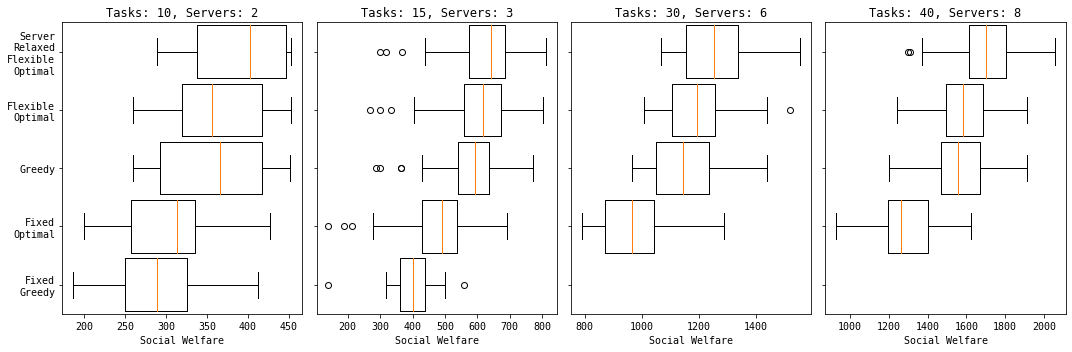

In [9]:
greedy_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(15, 5))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_boxplot(greedy_folder, model_setting, greedy_algos, model_plot)
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Social Welfare')
    model_plot.set_yticklabels([''] * len(greedy_algos))
model_plots[0].set_yticklabels(['Fixed\nGreedy', 'Fixed\nOptimal', 'Greedy', 
                                'Flexible\nOptimal', 'Server\nRelaxed\nFlexible\nOptimal'])
plt.tight_layout()

c:\users\markm\anaconda3\envs\flexible-cloud-resource\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


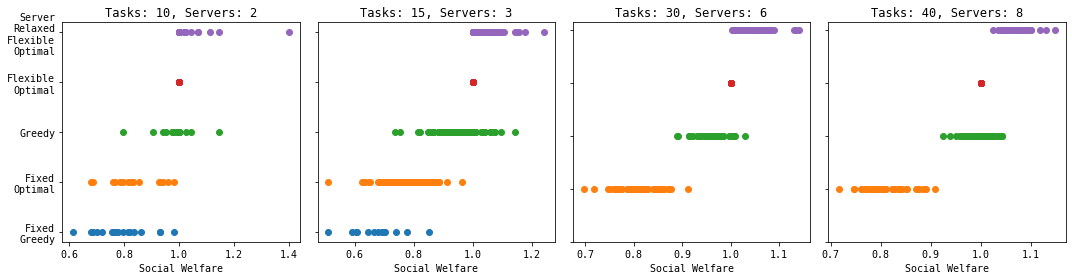

In [10]:
greedy_fig, model_plots = plt.subplots(1, len(model_settings), figsize=(15, 4))
for model_setting, model_plot in zip(model_settings, model_plots):
    plot_data_optimal(greedy_folder, model_setting, greedy_algos, model_plot, 'Flexible Optimal')
    model_plot.set_title(model_setting.replace('t', 'Tasks: ').replace('_s', ', Servers: '))
    model_plot.set_xlabel('Social Welfare')
    model_plot.set_yticklabels([''] * len(greedy_algos))
    model_plot.set_yticks(np.arange(0, len(greedy_algos)))
model_plots[0].set_yticklabels(['Fixed\nGreedy', 'Fixed\nOptimal', 'Greedy', 
                                'Flexible\nOptimal', 'Server\nRelaxed\nFlexible\nOptimal'])
plt.tight_layout()